# Computation of annotation enrichment in a genetic set 

This code excerpt shows how to use the annotation enrichment computation function in a genetic set.
The funciton return a dataframe of binom and hypergeometric p-value (<= 0.05) and for each p-value a fdr correction with alpha = 0.05.   

In the second part of the code we will compare the results obtained with the Great webserver and between the binomial and hypergeometric probability

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import greatpy as great
import pandas as pd
from math import inf
from numpy import log,nan, int64,cov,corrcoef
from scipy.stats import pearsonr
from seaborn import scatterplot as sp

import warnings
warnings.filterwarnings('ignore')

## I Compute the p-values

In [6]:
enrichment_fdr = great.tl.enrichment(
    test="../data/human/test_genomic_region.bed",
    regdom_file="../data/human/regulatory_domain.bed",
    chr_size_file="../data/human/chr_size.bed",
    annotation="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("fdr",0.05),
    sort_by="binom_fdr_correction",
    )

In [7]:
enrichment_fdr

,go_term,binom_p_value,hypergeom_p_value,binom_fdr_correction,hypergeom_fdr_correction
GO:0045887,positive regulation of synaptic growth at neur...,5.17744e-13,2.92750e-03,3.07540e-10,9.64682e-02
GO:0016561,"protein import into peroxisome matrix, translo...",6.31131e-10,5.84656e-03,9.37230e-08,9.64682e-02
GO:0044721,"protein import into peroxisome matrix, substra...",4.83812e-10,2.92750e-03,9.37230e-08,9.64682e-02
GO:0036250,peroxisome transport along microtubule,4.83812e-10,2.92750e-03,9.37230e-08,9.64682e-02
GO:0047485,protein N-terminus binding,1.29450e-09,5.03770e-03,1.53786e-07,9.64682e-02
...,...,...,...,...,...
GO:0072197,ureter morphogenesis,1.97164e-02,5.84656e-03,4.43620e-02,9.64682e-02
GO:0061138,morphogenesis of a branching epithelium,2.06973e-02,8.75719e-03,4.63932e-02,1.00034e-01
GO:0045063,T-helper 1 cell differentiation,2.11867e-02,1.45533e-02,4.71344e-02,1.06496e-01
GO:0006888,ER to Golgi vesicle-mediated transport,2.11222e-02,5.36764e-01,4.71344e-02,6.10801e-01


In [8]:
enrichment_bonferroni = great.tl.enrichment(
    test="../data/human/test_genomic_region.bed",
    regdom_file="../data/human/regulatory_domain.bed",
    chr_size_file="../data/human/chr_size.bed",
    annotation="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("bonferroni",0.05),
    )

In [9]:
enrichment_bonferroni

,go_term,binom_p_value,hypergeom_p_value,binom_bonferroni_correction,hypergeom_bonferroni_correction
GO:0002162,dystroglycan binding,1.29786e-05,4.02252e-02,7.70928e-03,1
GO:0007213,G protein-coupled acetylcholine receptor signa...,4.28794e-05,4.86352e-02,2.54703e-02,1
GO:0033691,sialic acid binding,1.83861e-06,3.45779e-02,1.09214e-03,1
GO:0035374,chondroitin sulfate binding,1.06551e-06,2.60455e-02,6.32912e-04,1
GO:0043113,receptor clustering,6.53249e-05,7.61475e-02,3.88030e-02,1
...,...,...,...,...,...
GO:0008479,queuine tRNA-ribosyltransferase activity,1.75630e-05,1.16594e-02,1.04324e-02,1
GO:0101030,tRNA-guanine transglycosylation,2.90290e-05,1.16594e-02,1.72432e-02,1
GO:0044323,retinoic acid-responsive element binding,4.63051e-07,1.16594e-02,2.75052e-04,1
GO:0048387,negative regulation of retinoic acid receptor ...,8.90815e-06,2.60455e-02,5.29144e-03,1


In [145]:
enrichment_tot = enrichment_fdr 
enrichment_tot["binom_bonferroni_correction"] = enrichment_bonferroni["binom_bonferroni_correction"]
enrichment_tot["hypergeom_bonferroni_correction"] = enrichment_bonferroni["hypergeom_bonferroni_correction"]
enrichment_tot = enrichment_tot[["binom_p_value","binom_bonferroni_correction","binom_fdr_correction","hypergeom_p_value","hypergeom_bonferroni_correction","hypergeom_fdr_correction"]]
enrichment_tot = enrichment_tot.reset_index().rename(columns={"index":"id","binom_bonferroni_correction":"binom_bonferroni","binom_fdr_correction":"binom_fdr","hypergeom_p_value":"hyper_p_value","hypergeom_bonferroni_correction":"hyper_bonferroni","hypergeom_fdr_correction":"hyper_fdr"})

## II Compare to GREAT webserver  

### II.1 Import the data

In [156]:
great_webserver = pd.read_csv("../data/output_great_webserver.tsv",sep="\t",comment="#",
                    names=["ontologie","term_name","ID","binom_p_value","binom_bonferroni","binom_fdr","hyper_p_value","hyper_bonferroni","hyper_fdr"],index_col=False,
                    dtype={"term_name":"object", "ID":"object","binom_p_value":"float64", "binom_bonferroni":"float64", "binom_fdr":"float64", "hyper_p_value":"float64", "hyper_bonferroni":"float64", "hyper_fdr":"float64"})
great_webserver.rename(columns={"ID":"id"},inplace=True)
del great_webserver["ontologie"]
del great_webserver["term_name"]

### II.2 Compare the results between greatpy and great 

#### II.2.1 Preprocessing

In [210]:
enrichment_tot = enrichment_tot[enrichment_tot["id"].isin(list(great_webserver["id"]))]
enrichment_tot = enrichment_tot.sort_values("id")

In [211]:
great_webserver = great_webserver[great_webserver["id"].isin(list(enrichment_tot["id"]))]
great_webserver = great_webserver.sort_values("id")

In [198]:
binom_greatpy = hyper_greatpy = binom_great = hyper_great = []
for i in range(enrichment_tot.shape[0]) : 
    curr_enrichment = enrichment_tot.iloc[i]
    curr_great_webserver = great_webserver.loc[great_webserver["id"]==curr_enrichment["id"]]
    binom_greatpy.append(float(curr_enrichment["binom_p_value"]))
    hyper_greatpy.append(float(curr_enrichment["hyper_p_value"]))
    binom_great.append(float(curr_great_webserver["binom_p_value"]))
    hyper_great.append(float(curr_great_webserver["hyper_p_value"]))
binom = pd.DataFrame({"binom_greatpy":binom_greatpy,"binom_great":binom_great})
hyper = pd.DataFrame({"hyper_greatpy":hyper_greatpy,"hyper_great":hyper_great})

#### II.2.b Graphical

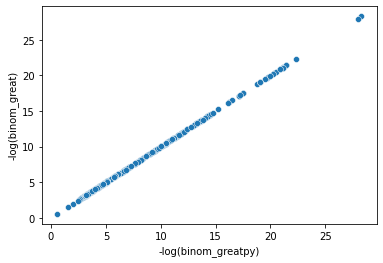

In [208]:
pl=great.pl.scatterplot(binom,colname_x="binom_greatpy",colname_y="binom_great")

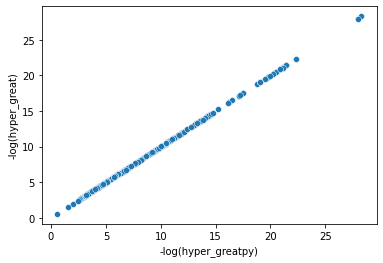

In [209]:
great.pl.scatterplot(hyper,colname_x="hyper_greatpy",colname_y="hyper_great")

#### II.2.c Statistics

In [203]:
def stat(binom_great_list_list, hyper_great_listpy_list,binom_great_list,hyper_great_list) : 
    return pd.DataFrame({
        "binom": [cov(m = binom_great_list_list, y = binom_great_list)[0][1],pearsonr(binom_great_list_list,binom_great_list)[0]],
        "hyper":[cov(m = hyper_great_listpy_list, y = hyper_great_list)[0][1],pearsonr(hyper_great_listpy_list,hyper_great_list)[0]]},
        index=["correlation_coefficient","pearson"])

In [204]:
stat(binom_greatpy, hyper_greatpy,binom_great,hyper_great)

,binom,hyper
correlation_coefficient,1.30859e-03,1.30859e-03
pearson,1.00000e+00,1.00000e+00


The result returned by greatpy is similar to the one obtained (pearson coefficient = 1) but the results have been reduced to select only the ids present in great_output and greatpy_output. 

On the other hand, the two variables (binomial probability and hypergeometric probability) do not seem to be correlated because the correlation coefficient is close to 0 

## III Compare both results

### III.1 Without correction

#### III.1.a Without log scale

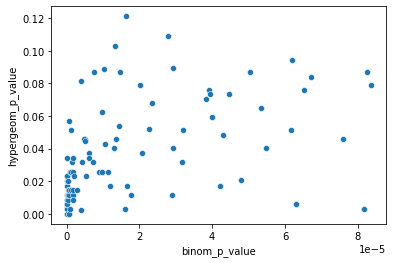

In [186]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_p_value",
    "hypergeom_p_value",
    minus_log10=False)

#### III.1.b With log scale

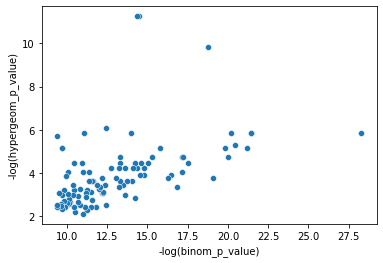

In [187]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_p_value",
    "hypergeom_p_value",
    minus_log10=True)

Resembling the images of the articule published by the Berjano lab: https://www.nature.com/articles/nbt.1630/figures/2

### III.2 With fdr correction

#### III.2.a without log scale

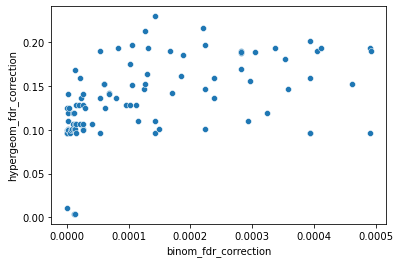

In [188]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_fdr_correction",
    "hypergeom_fdr_correction",
    minus_log10=False)


#### III.2.b with log scale

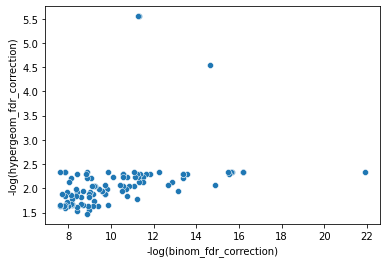

In [189]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_fdr_correction",
    "hypergeom_fdr_correction",
    minus_log10=True)

### III.3 With bonferroni correction

#### III.3.a without log scale

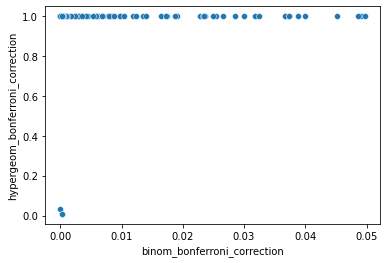

In [190]:
great.pl.scatterplot(
    enrichment_bonferroni,
    "binom_bonferroni_correction",
    "hypergeom_bonferroni_correction",
    minus_log10=False)

#### III.3.b with log scale

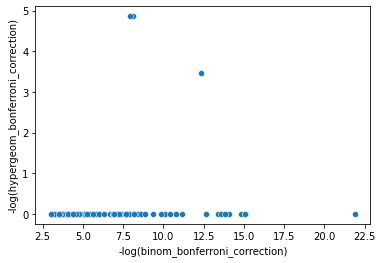

In [191]:
great.pl.scatterplot(
    enrichment_bonferroni,
    "binom_bonferroni_correction",
    "hypergeom_bonferroni_correction",
    minus_log10=True)

We observe that the two probability values returned by greatpy (binomial and hypergeometric) are very different. According to the documentation of Great : 

By default, GREAT ranks results by the binomial p-value, and we consider this the single best way to examine genome-wide cis-regulatory datasets. It accounts for biases in gene regulatory domain size and provides an accurate picture of the cis-regulatory landscape. (https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655456/Statistics) 